In [1]:
## Compare the sensitivity of different parameters
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os, sys

In [2]:
qsg = np.array([100, 250, 500, 1000])
qsg_f = np.array([1.5, 4, 9]) # Increase percentage *100%

strat = np.array([1, 2, 3])
strat_f = np.array([1, 2]) # Increase percentage *100%

hs = np.array([1,2,3,4,5])
hs_f = np.array([0.5, 1, 1.5, 2]) # Increase percentage *100%


cd = np.array([2,3,4])
cd_f = np.array([1,19]) # Increase percentage *100%


# Gather Qe and Qsm
Qe_qsg = np.empty(len(qsg_f))
Qsm_qsg = np.empty(len(qsg_f))
Qe_strat = np.empty(len(strat_f))
Qsm_strat = np.empty(len(strat_f))
Qe_hs = np.empty(len(hs_f))
Qsm_hs = np.empty(len(hs_f))
Qe_cd = np.empty(len(cd_f))
Qsm_cd = np.empty(len(cd_f))

In [3]:
# Ref: Qsg=500, hs/h=0.08, strat=strat001
Qsm1 = np.empty(len(qsg))
Qe1 = np.empty(len(qsg))
for i in range(len(qsg)):  
    file1 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/Comp/Qsg_comp/Qsg_' + str(format(qsg[i],'04d')) + '.nc')
    Qsm1[i] = file1.Qsm.data[2]
    Qe1[i] = file1.Qe.data[2]
for j in range(len(qsg_f)):
    Qe_qsg[j] = (Qe1[j+1] - Qe1[0]) / Qe1[0] 
    Qsm_qsg[j] = (Qsm1[j+1] - Qsm1[0]) / Qsm1[0]
    

Qsm2 = np.empty(len(strat))
Qe2 = np.empty(len(strat))
for i in range(len(strat)):  
    file2 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/Comp/Strat_comp/Strat_' + str(format(strat[i],'03d')) + '.nc')
    Qsm2[i] = file2.Qsm.data[2]
    Qe2[i] = file2.Qe.data[2]
for j in range(len(strat_f)):
    Qe_strat[j] = (Qe2[j+1] - Qe2[0]) / Qe2[0] 
    Qsm_strat[j] = (Qsm2[j+1] - Qsm2[0]) / Qsm2[0]

    

file3 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/Comp/Qsg_comp/Qsg_0500.nc')
Qsm3 = file2.Qsm.data
Qe3 = file3.Qe.data
for j in range(len(hs_f)):
    Qe_hs[j] = (Qe3[j+1] - Qe3[0]) / Qe3[0] 
    Qsm_hs[j] = (Qsm3[j+1] - Qsm3[0]) / Qsm3[0]

    
Qsm4 = np.empty(len(cd))
Qe4 = np.empty(len(cd))
for i in range(len(cd)):  
    file4 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/Comp/Cd_comp/Cd_' + str(format(cd[i],'03d')) + '.nc')
    Qsm4[i] = file4.Qsm.data[2]
    Qe4[i] = file4.Qe.data[2]
for j in range(len(cd_f)):
    Qe_cd[j] = (Qe4[j+1] - Qe4[0]) / Qe4[0] 
    Qsm_cd[j] = (Qsm4[j+1] - Qsm4[0]) / Qsm4[0]    

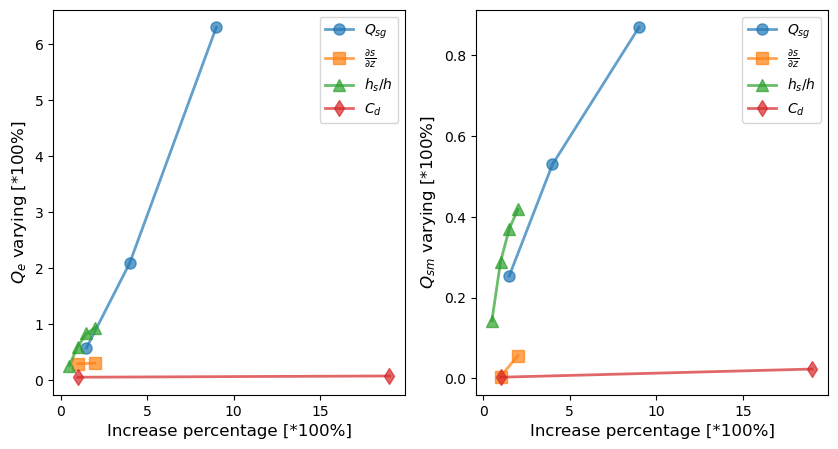

In [8]:
fig1 = plt.figure(figsize=(10,5))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

ax1.plot(qsg_f, np.abs(Qe_qsg),'o-',ms=8,lw=2,alpha=0.7,label=r'$Q_{sg}$')
ax1.plot(strat_f, np.abs(Qe_strat),'s-',ms=8,lw=2,alpha=0.7,label=r'$\frac{\partial s}{\partial z}$')
ax1.plot(hs_f, np.abs(Qe_hs),'^-',ms=8,lw=2,alpha=0.7,label=r'$h_s/h$')
ax1.plot(cd_f, np.abs(Qe_cd),'d-',ms=8,lw=2,alpha=0.7,label=r'$C_d$')
ax1.legend(loc='best')
ax1.set_ylabel(r'$Q_e$ varying [*100%]',size = 12)
ax1.set_xlabel(r'Increase percentage [*100%]', size = 12)


ax2.plot(qsg_f, np.abs(Qsm_qsg),'o-',ms=8,lw=2,alpha=0.7,label=r'$Q_{sg}$')
ax2.plot(strat_f, np.abs(Qsm_strat),'s-',ms=8,lw=2,alpha=0.7,label=r'$\frac{\partial s}{\partial z}$')
ax2.plot(hs_f, np.abs(Qsm_hs),'^-',ms=8,lw=2,alpha=0.7,label=r'$h_s/h$')
ax2.plot(cd_f, np.abs(Qsm_cd),'d-',ms=8,lw=2,alpha=0.7,label=r'$C_d$')
ax2.legend(loc='best')
ax2.set_ylabel(r'$Q_{sm}$ varying [*100%]',size = 12)
ax2.set_xlabel(r'Increase percentage [*100%]', size = 12)
plt.show()

In [9]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/Comp_cases/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig1.savefig(fig_path + '/Parameter_comp.png', dpi=200, bbox_inches='tight')